Alexander Rasho:
Mashup of Machine Learning Projects using Linear Regression and Decision Trees

Decision Tree Classification using sklearn framework

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz

iris = load_iris()
clf = tree.DecisionTreeClassifier() #Store Classifier Object
clfIris = clf.fit(iris.data, iris.target) #Train the Tree with sample data from iris
plabel1 = clf.predict([[5, 3.1, 1.2, 0.4]]) #prediction example with classificiation tree from training data
plabel2 = clf.predict([[6.2, 6, 8, 10]]) #second prediction example
print(plabel1) #label generated as integer
print(plabel2) #label generated as integer

data = tree.export_graphviz(clfIris, out_file=None) 
graph = graphviz.Source(data) #create graphical representation of classification tree
graph.render("TheIrisTree") #Render to File System


[0]
[2]


'TheIrisTree.pdf'

Decision Tree Regression using sklearn framework

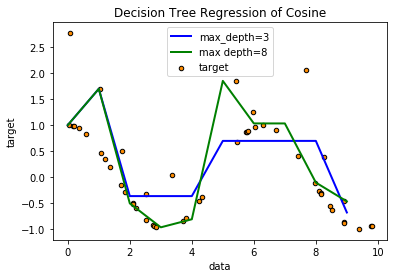

Max depth = 8 overfits heavily while max_depth = 3 underfits


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as pl

rng = np.random.RandomState(100)
X = np.sort(10 * rng.rand(50, 1), axis=0) #randomly generate 50 X values between 0,100
y = np.cos(X).ravel() #create target variables


for i in range (1, y.size, 5): #add some error noise to target values
    PolarRand = 1 * rng.rand(1) #randomly negate or add a value of 2
    if PolarRand < 1:
        y[i] += 2 * rng.rand(1)
    else:
        y[i] -= 2 * rng.rand(1)

regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0, 10, 1)[:, np.newaxis] #create test 
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

pl.figure()
pl.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="target")
pl.plot(X_test, y_1, color="blue",
         label="max_depth=3", linewidth=2)
pl.plot(X_test, y_2, color="green", label="max depth=8", linewidth=2)
pl.xlabel("data")
pl.ylabel("target")
pl.title("Decision Tree Regression of Cosine")
pl.legend()
pl.show()
print("Max depth = 8 overfits heavily while max_depth = 3 underfits")

Random Forest Classification using sklearn

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=80, max_depth=3, random_state=0)
clf.fit(X, y)

clf2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=2)
clf2.fit(X, y)

print("Feature Informativeness (Forest 1):", clf.feature_importances_) #Show how informative each feature is in the Random Forest Tree
print("Predicted Label (Forest 1):", clf.predict([[.5, .2, 1, 0]])) #Predict a label for a test data

print("Feature Informativeness (Forest 2):", clf2.feature_importances_) #Show how informative each feature is in the Random Forest Tree
print("Predicted Label (Forest 2):", clf2.predict([[.5, .2, 1, 0]])) #Predict a label for a test data

print("\nDecision Path (Forest 1): \n\n", clf.decision_path(X)) #Show which nodes are passing through data


Feature Informativeness (Forest 1): [ 0.07902083  0.86991497  0.01749882  0.03356539]
Predicted Label (Forest 1): [1]
Feature Informativeness (Forest 2): [ 0.14703166  0.79852039  0.03169203  0.02275592]
Predicted Label (Forest 2): [1]

Decision Path (Forest 1): 

 (<1000x1150 sparse matrix of type '<class 'numpy.int64'>'
	with 319629 stored elements in Compressed Sparse Row format>, array([   0,   15,   30,   43,   58,   73,   88,  103,  118,  133,  148,
        163,  178,  191,  206,  221,  236,  249,  264,  279,  294,  307,
        320,  335,  350,  365,  380,  395,  410,  425,  440,  453,  464,
        479,  494,  509,  524,  537,  552,  567,  580,  593,  606,  617,
        632,  645,  660,  675,  690,  705,  718,  731,  746,  759,  774,
        789,  804,  817,  832,  845,  858,  873,  886,  901,  916,  931,
        946,  961,  976,  991, 1006, 1019, 1034, 1049, 1064, 1079, 1092,
       1107, 1122, 1135, 1150]))


Linear and Polynomial Regression with L2 Regularization

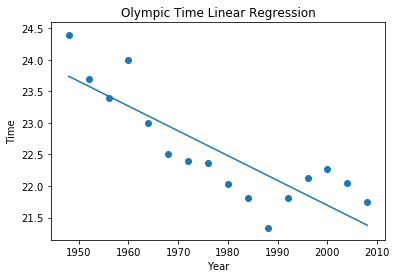

mse =  0.213676948529


In [4]:
#1.
data = np.loadtxt('/Users/alexrasho/Downloads/female200.csv', delimiter=',')
x = np.loadtxt('/Users/alexrasho/Downloads/female200.csv', delimiter=',', usecols=(0,))
y = np.loadtxt('/Users/alexrasho/Downloads/female200.csv', delimiter=',', usecols=(1,))

(m,b0) = np.polyfit(x, y, 1) #1st order polynomial linear regression fit of Olympic time
yhat = np.polyval([m, b0], x) #predict
pl.plot(x, yhat)
pl.xlabel("Year")
pl.ylabel("Time")
pl.title("Olympic Time Linear Regression")
pl.scatter(x,y)
pl.show()

mse = np.square(np.subtract(y, yhat)).mean() #mean square error of line
print('mse = ', mse) 

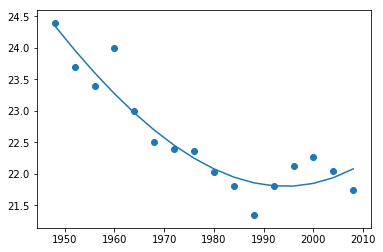

mse =  0.0871786711206


In [5]:
(m,b0,b1,b2) = np.polyfit(x, y, 3) #Third Order Polynomial Fit
yhat = np.polyval([m, b0, b1, b2], x)
pl.plot(x, yhat)
pl.scatter(x,y)
pl.show()

mse = np.square(np.subtract(y, yhat)).mean()
print("mse = ", mse)

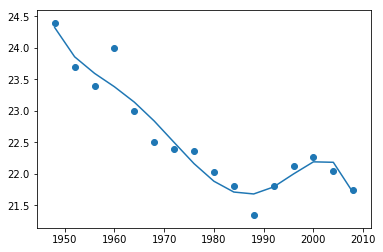

0.0516150626812


In [6]:
(m,b0,b1,b2,b3,b4) = np.polyfit(x, y, 5) #5th Order fit
yhat = np.polyval([m, b0, b1, b2, b3, b4], x)
pl.plot(x, yhat)
pl.scatter(x,y)
pl.show()

mse = np.square(np.subtract(y, yhat)).mean()
print(mse)

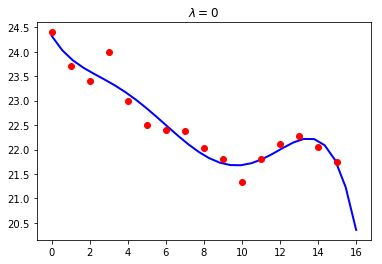

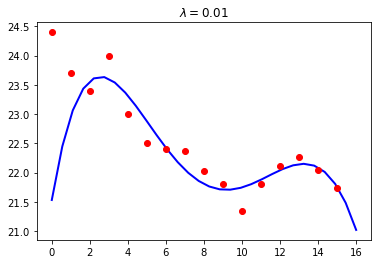

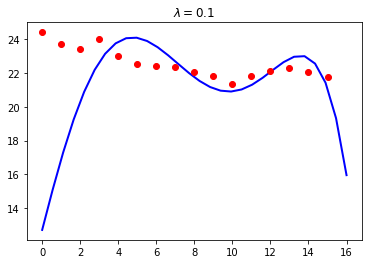

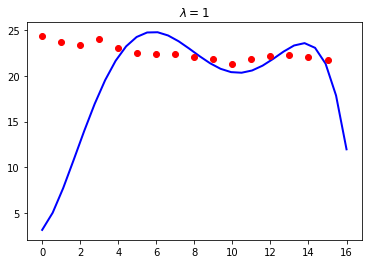

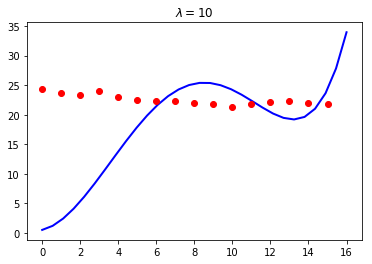

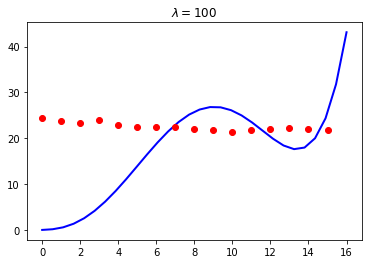

In [7]:
x = np.loadtxt('/Users/alexrasho/Downloads/female200.csv', delimiter=',', usecols=(0,))
y = np.loadtxt('/Users/alexrasho/Downloads/female200.csv', delimiter=',', usecols=(1,))
x = np.reshape(x, (16,1))
y = np.reshape(y, (16,1))
import pylab as plt
x = (x-1948)/4 #Normalizing the values of X

maxorder = 5 
x_test = np.linspace(0,16,30)[:,None] #Generate x_test data
X = np.ones_like(x)
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1): #Preparing and applying X data transformations
    X = np.hstack((X,x**i))
    X_test = np.hstack((X_test,x_test**i))

for lamb in [0,.01,0.1,1,10,100]: #Using L2 Regularization with Varying lambda values
    w = np.linalg.solve(np.dot(X.T,X) + x.size*lamb*np.identity(maxorder+1),np.dot(X.T,y))
    f_test = np.dot(X_test,w)
    plt.figure()
    plt.plot(x_test,f_test,'b-',linewidth=2)
    plt.plot(x,y,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)

plt.show()

Splitting Data into testing and training sets and comparing age and wage values

Coefficients: 
 [[ 0.68259557]] 

Intercept: 
 [ 82.56507218] 

R^2 Score: 0.04


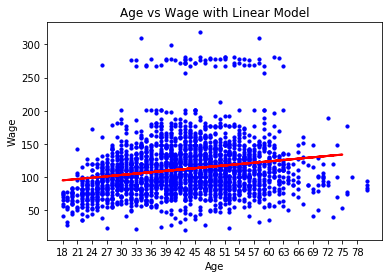

In [8]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pandas.read_csv('/Users/alexrasho/Downloads/Wage.csv')
age = data[['age']]
wage = data[['wage']]

ageTrain, ageTest, wageTrain, wageTest = train_test_split(age, wage, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(ageTrain, wageTrain)

wagePred = model.predict(ageTest) #Predict for the Test set

print('Coefficients: \n', model.coef_,'\n') #The coefficients of the model
print('Intercept: \n', model.intercept_, '\n') #The intercept of the model
print('R^2 Score: %.2f' % r2_score(wageTest, wagePred)) #R^2

pl.scatter(ageTrain,wageTrain,10, color='blue')
pl.xticks(np.arange(int(ageTrain.min()),int(ageTrain.max()), 3.0))
pl.title("Age vs Wage with Linear Model")
pl.xlabel("Age")
pl.ylabel("Wage")
pl.plot(ageTest, wagePred, color='red', linewidth=2)

pl.show()

Ridge Regression on Linear and Polynomial degree 4 Model:

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

polymodel = PolynomialFeatures(degree=4)

ageTest = ageTest.sort_index() #Sort the X indexes
ageTrain = ageTrain.sort_index() #Sort the X indexes

a = polymodel.fit(ageTrain, wageTrain)

ageTrain_ = polymodel.fit_transform(ageTrain) #Transform ageTrain to represent polynomial of degree 4
ageTest_ = polymodel.transform(ageTest) #Transform ageTest to represent polynomial of degree 4

clf = Ridge().set_params(alpha=.1)

wageTest_ = polymodel.transform(wageTest)
clf.fit(ageTrain_, wageTrain)

print('Coefficients for alpha = .1:', clf.coef_, '\n')
print('Intercept:')
print(clf.intercept_, '\n')
print('R2 Score:')
print(clf.score(ageTest_, wageTest))
print("\nThe R2 Score has worsened")

Coefficients for alpha = .1: [[  0.00000000e+00  -2.38956280e+00   6.29258999e-02  -5.73169805e-04
    1.06276716e-06]] 

Intercept:
[ 139.8245243] 

R2 Score:
-0.000531462851488

The R2 Score has worsened


Ridge Cross Validation on degree 4 polynomial:

In [10]:
from sklearn.linear_model import RidgeCV
import numpy as np
#Cross Validate multiple alphas to see which works best for Ridge Regression
clf2 = RidgeCV(alphas=[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0], store_cv_values=True).fit(ageTrain_, wageTrain)

cv_mse = np.mean(clf2.cv_values_, axis=0) #store MSE value for each test

print("MSE for each alpha with respect to order:", cv_mse, '\n')

print('Best Alpha: ', clf2.alpha_)

MSE for each alpha with respect to order: [[ 1663.70126307  1663.70122673  1663.70115404  1663.70093604
   1663.70057288  1663.69984717  1663.69767505  1663.69407145
   1663.68692582  1663.66596924]] 

Best Alpha:  1.0


Improve the Model by adding a categorical feature and transforming into a dummy variable for regression.

In [11]:
df = pandas.DataFrame(data, columns = ['age', 'jobclass', 'wage'])

df_jobclass = pandas.get_dummies(df['jobclass']) #Create dummy variables for jobclass
df = pandas.DataFrame(data, columns = ['age', 'wage'])
df = pandas.concat([df, df_jobclass], axis=1)

X = df[['age','1. Industrial','2. Information']] #Congregate together feature variable and dummy variables
y = wage

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0) #80% train and 20% test
model.fit(XTrain,yTrain)

print('New R^2 Value: ' , model.score(XTest, yTest)) #Find new R^2 value

print("\n The R2 Score has slightly improved when the jobClass feature was added")

New R^2 Value:  0.0669185802959

 The R2 Score has slightly improved when the jobClass feature was added


In [12]:
print(df) #Dummy variable representation of if Jobclass is Industrial or Information

      age        wage  1. Industrial  2. Information
0      18   75.043154              1               0
1      24   70.476020              0               1
2      45  130.982177              1               0
3      43  154.685293              0               1
4      50   75.043154              0               1
5      54  127.115744              0               1
6      44  169.528538              1               0
7      30  111.720849              0               1
8      41  118.884359              0               1
9      52  128.680488              0               1
10     45  117.146817              0               1
11     34   81.283253              1               0
12     35   89.492480              0               1
13     39  134.705375              1               0
14     54  134.705375              0               1
15     51   90.481913              1               0
16     37   82.679637              1               0
17     50  212.842352              0          